In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\JUAN\Documents\GitHub\CD\Projeto 01


In [3]:
dados2015=pd.read_table("PNAD DOM2015\\DOM2015csv\\DOM2015.csv", encoding="windows-1252", sep=",")

In [4]:
dados2015.shape

(151189, 81)

In [5]:
# SEPARANDO OS DOMICILIOS POR REGIOES
dados2015.shape
dados2015.loc[(dados2015.UF>10)&(dados2015.UF<20),"REGIAO"] = "Norte"
dados2015.loc[(dados2015.UF>20)&(dados2015.UF<30),"REGIAO"] = "Nordeste"
dados2015.loc[(dados2015.UF>40)&(dados2015.UF<44),"REGIAO"] = "Sul"
dados2015.loc[(dados2015.UF>30)&(dados2015.UF<35),"REGIAO"] = "Sudeste"
dados2015.loc[(dados2015.UF>49)&(dados2015.UF<54),"REGIAO"] = "Centro-Oeste"
dados2015.head(5)

,Unnamed: 0,V0101,UF,V0102,V0103,V0104,V0105,V0106,V0201,V0202,...,V4614,UPA,V4617,V4618,V4620,V4621,V4622,V4624,V9992,REGIAO
0,0,2015,11,15,1,1,1.0,1.0,1.0,4.0,...,800.0,191,110001,1,1.0,800.0,4.0,1.0,20161104,Norte
1,1,2015,11,15,2,6,NaN,NaN,NaN,NaN,...,NaN,191,110001,1,NaN,NaN,NaN,NaN,20161104,Norte
2,2,2015,11,15,3,1,1.0,1.0,1.0,4.0,...,1150.0,191,110001,1,1.0,1150.0,4.0,1.0,20161104,Norte
3,3,2015,11,15,4,1,6.0,4.0,1.0,2.0,...,4760.0,191,110001,1,6.0,793.0,4.0,2.0,20161104,Norte
4,4,2015,11,15,5,1,2.0,2.0,1.0,2.0,...,5800.0,191,110001,1,2.0,2900.0,6.0,2.0,20161104,Norte


In [6]:
# Tenho o intuito de analisar a renda da populucao brasileira nas diferentes regioes e simultaneamente analisar o acesso a
# celular e internet, e, com isso, procurar um mercado promissor (com boa renda e pouco acesso comparado)

In [7]:
#CRIANDO UM FILTRO PARA REGIÕES URBANAS E RURAIS

dados2015.loc[(dados2015.V4105>=1)&(dados2015.V4105<=3),"URBANIZACAO"] = "Urbana"
dados2015.loc[(dados2015.V4105>3)&(dados2015.V4105<=8),"URBANIZACAO"] = "Rural"


In [8]:
# CRIANDO UM FILTRO PARA RENDIMENTO DOMICILIAR

# dados2015.loc[(dados2015.V4614>=1)&(dados2015.V4614<=500),"RENDA"] = "Até R$500"
# dados2015.loc[(dados2015.V4614>500)&(dados2015.V4614<=1000),"RENDA"] = "Entre R$500 e R$1000"
# dados2015.loc[(dados2015.V4614>1000)&(dados2015.V4614<=2000),"RENDA"] = "Entre R$1.000 e R$2.000"
# dados2015.loc[(dados2015.V4614>2000)&(dados2015.V4614<=3000),"RENDA"] = "Entre R$2.000 e R$3.000"
# dados2015.loc[(dados2015.V4614>3000)&(dados2015.V4614<=5000),"RENDA"] = "Entre R$3.000 e R$5.000"
# dados2015.loc[(dados2015.V4614>5000)&(dados2015.V4614<=10000),"RENDA"] = "Entre R$5.000 e R$10.000"
# dados2015.loc[(dados2015.V4614>10000),"RENDA"] = "Maior que R$10.000"
dados2015 = dados2015.rename(columns = {"V4614":"RENDA"})

In [9]:
# CRIANDO UM FILTRO PARA RENDIMENTO MENSAL DOMICILIAR EM SALARIOS MINIMOS 

dados2015.loc[(dados2015.RENDA>=1)&(dados2015.RENDA<=(937*(1/2))),"SALARIOS MINIMOS"] = "Até 1/2 salarios"
dados2015.loc[(dados2015.RENDA>(937*(1/2)))&(dados2015.RENDA<=937),"SALARIOS MINIMOS"] = "Entre 1/2 e 1 salario"
dados2015.loc[(dados2015.RENDA>937)&(dados2015.RENDA<=937*2),"SALARIOS MINIMOS"] = "Entre 1 e 2 salarios"
dados2015.loc[(dados2015.RENDA>937*2)&(dados2015.RENDA<=937*3),"SALARIOS MINIMOS"] = "Entre 2 e 3 salarios"
dados2015.loc[(dados2015.RENDA>937*3)&(dados2015.RENDA<=937*5),"SALARIOS MINIMOS"] = "Entre 3 e 5 salarios"
dados2015.loc[(dados2015.RENDA>937*5)&(dados2015.RENDA<=937*10),"SALARIOS MINIMOS"] = "Entre 5 e 10 salarios"
dados2015.loc[(dados2015.RENDA>937*10),"SALARIOS MINIMOS"] = "Mais que 10 salarios"


In [10]:
# CRIANDO UM FILTRO PARA AS PESSOAS QUE TEM ACESSO A INTERNET NO PROPRIO DOMICILIO

dados2015.loc[(dados2015.V02322 == 2),"ACESSO A INTERNET"] = "Sim"
dados2015.loc[(dados2015.V02322 == 4),"ACESSO A INTERNET"] = "Nao"

In [11]:
# CRIANDO UM FILTRO PARA COMO AS PESSOAS ACESSAM A INTERNET
dados2015.loc[(dados2015.V02426 == 4),"BANDA LARGA"] = "Nao"
dados2015.loc[(dados2015.V02425 == 4),"CONEXAO DISCADA"] = "Nao"
dados2015.loc[(dados2015.V02424 == 4),"3G"] = "Nao"
dados2015.loc[(dados2015.V02426 == 2),"BANDA LARGA"] = "Sim"
dados2015.loc[(dados2015.V02425 == 2),"CONEXAO DISCADA"] = "Sim"
dados2015.loc[(dados2015.V02424 == 2),"3G"] = "Sim"


In [12]:
# CRIANDO UM FILTRO PARA AS PESSOAS QUE TEM ACESSO A CELULAR NO PROPRIO DOMICILIO
dados2015.loc[(dados2015.V0220 == 2),"ACESSO A CELULAR"] = "Sim"
dados2015.loc[(dados2015.V0220 == 4),"ACESSO A CELULAR"] = "Nao"

In [13]:
#dados2015["ACESSO A INTERNET"].head(10)
# dados2015.V02426[(dados2015.V0)]

In [14]:
# dados2015[(dados2015.V02426 == 4) | ]


In [15]:
dados2015["ACESSO A INTERNET"]

0         Nao
1         NaN
2         Sim
3         Sim
4         Nao
5         Sim
6         Nao
7         Nao
8         Sim
9         NaN
10        Sim
11        Sim
12        NaN
13        Sim
14        NaN
15        Sim
16        Nao
17        Sim
18        Sim
19        Sim
20        Sim
21        Nao
22        NaN
23        Sim
24        NaN
25        NaN
26        Nao
27        Sim
28        Sim
29        Sim
         ... 
151159    Sim
151160    NaN
151161    Sim
151162    NaN
151163    Sim
151164    Sim
151165    Sim
151166    NaN
151167    Sim
151168    Sim
151169    Sim
151170    Sim
151171    Sim
151172    Nao
151173    Sim
151174    NaN
151175    Sim
151176    NaN
151177    NaN
151178    NaN
151179    Nao
151180    Nao
151181    Nao
151182    Sim
151183    NaN
151184    Nao
151185    Nao
151186    Sim
151187    Nao
151188    Sim
Name: ACESSO A INTERNET, dtype: object

In [16]:
dados_interesse = dados2015.loc[:, ["REGIAO","URBANIZACAO","RENDA","SALARIOS MINIMOS","ACESSO A INTERNET","ACESSO A CELULAR","CONEXAO DISCADA","BANDA LARGA","3G"]]

In [17]:
dados_interesse

,REGIAO,URBANIZACAO,RENDA,SALARIOS MINIMOS,ACESSO A INTERNET,ACESSO A CELULAR,CONEXAO DISCADA,BANDA LARGA,3G
0,Norte,Urbana,8.000000e+02,Entre 1/2 e 1 salario,Nao,Sim,NaN,NaN,NaN
1,Norte,Urbana,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Norte,Urbana,1.150000e+03,Entre 1 e 2 salarios,Sim,Sim,Nao,Sim,Sim
3,Norte,Urbana,4.760000e+03,Entre 5 e 10 salarios,Sim,Sim,Nao,Sim,Sim
4,Norte,Urbana,5.800000e+03,Entre 5 e 10 salarios,Nao,Sim,NaN,NaN,NaN
5,Norte,Urbana,1.990000e+03,Entre 2 e 3 salarios,Sim,Nao,Nao,Sim,Nao
6,Norte,Urbana,7.000000e+02,Entre 1/2 e 1 salario,Nao,Sim,NaN,NaN,NaN
7,Norte,Urbana,4.000000e+03,Entre 3 e 5 salarios,Nao,Sim,NaN,NaN,NaN
8,Norte,Urbana,4.090000e+03,Entre 3 e 5 salarios,Sim,Sim,Nao,Sim,Sim
9,Norte,Urbana,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#(dados_interesse.RENDA).round(decimals=1)

In [19]:
! explorer .


In [49]:

#dados_interesse=dados_interesse.dropna(axis = 0,how="any")
dados_interesse = dados_interesse[pd.notnull(dados_interesse['ACESSO A INTERNET'])][pd.notnull(dados_interesse['RENDA'])]


#quem nao tem internet fica com NaN nas perguntas sobre como acessa a intenet

,REGIAO,URBANIZACAO,RENDA,SALARIOS MINIMOS,ACESSO A INTERNET,ACESSO A CELULAR,CONEXAO DISCADA,BANDA LARGA,3G
0,Norte,Urbana,8.000000e+02,Entre 1/2 e 1 salario,Nao,Sim,NaN,NaN,NaN
2,Norte,Urbana,1.150000e+03,Entre 1 e 2 salarios,Sim,Sim,Nao,Sim,Sim
3,Norte,Urbana,4.760000e+03,Entre 5 e 10 salarios,Sim,Sim,Nao,Sim,Sim
4,Norte,Urbana,5.800000e+03,Entre 5 e 10 salarios,Nao,Sim,NaN,NaN,NaN
5,Norte,Urbana,1.990000e+03,Entre 2 e 3 salarios,Sim,Nao,Nao,Sim,Nao
6,Norte,Urbana,7.000000e+02,Entre 1/2 e 1 salario,Nao,Sim,NaN,NaN,NaN
7,Norte,Urbana,4.000000e+03,Entre 3 e 5 salarios,Nao,Sim,NaN,NaN,NaN
8,Norte,Urbana,4.090000e+03,Entre 3 e 5 salarios,Sim,Sim,Nao,Sim,Sim
10,Norte,Urbana,5.150000e+03,Entre 5 e 10 salarios,Sim,Sim,Nao,Sim,Sim
11,Norte,Urbana,2.500000e+03,Entre 2 e 3 salarios,Sim,Sim,Nao,Sim,Sim


In [21]:
# df_filtered = df.query('a == 4 & b != 2')

In [22]:
# Dados filtrados, tirados os valores invalidos

In [23]:
dados_interesse.RENDA.describe()


count    1.176010e+05
mean     1.960018e+10
std      1.386224e+11
min      0.000000e+00
25%      1.100000e+03
50%      2.000000e+03
75%      3.689000e+03
max      1.000000e+12
Name: RENDA, dtype: float64

In [24]:
#Existem valores muito altos de renda que nao descrevem a populacao em geral, entao, para que se tenha uma melhor compreensao
#do brasileiro, é necessario a exclusao desses valores


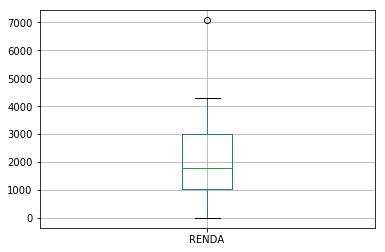

In [25]:
quantils=dados_interesse.RENDA.quantile(np.arange(0,1,.1))
quantils.plot(kind="box",grid=True)

In [26]:
quantils.describe()

count      10.000000
mean     2367.700000
std      2070.637478
min         0.000000
25%      1033.750000
50%      1794.000000
75%      3010.000000
max      7076.000000
Name: RENDA, dtype: float64

In [27]:
# retirado a parte que nao representa a populacao, tem-se uma melhor analise de dados

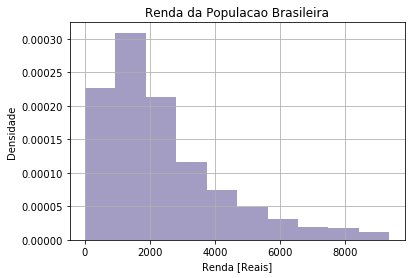

In [28]:
# Separando faixas iguais de renda em salarios minimos

faixa = np.arange(0,10000,937)
sal_min = pd.cut(dados_interesse.RENDA,faixa)
#sal_min.value_counts()
plot = dados_interesse.RENDA.plot.hist(bins=faixa,title="Renda da Populacao Brasileira", normed = 1,color="darkslateblue",alpha=0.5)
plt.xlabel("Renda [Reais]")
plt.ylabel("Densidade")
plt.grid(True)

In [29]:
#Esse grafico deixa claro onde está as rendas que representam melhor a população entre (0 e 5000), a partir disso, a porcentagem 
# da populacao representada é infima

In [30]:
sal_min.value_counts(sort=False, normalize=True)*100

(0, 937]        20.779185
(937, 1874]     29.120495
(1874, 2811]    20.117439
(2811, 3748]    10.995656
(3748, 4685]     7.058315
(4685, 5622]     4.548467
(5622, 6559]     2.887199
(6559, 7496]     1.827854
(7496, 8433]     1.621691
(8433, 9370]     1.043699
Name: RENDA, dtype: float64

In [31]:
#Temos mais de 50% da populacao brasileira ganhando entre 2 salarios minimos(até 1900 reais)

In [32]:
sal_min.value_counts()
sal_reg=pd.crosstab(dados_interesse["REGIAO"],sal_min,normalize = True)
b=sal_reg.sum().sum()
sal_reg*100/b


RENDA,"(0, 937]","(937, 1874]","(1874, 2811]","(2811, 3748]","(3748, 4685]","(4685, 5622]","(5622, 6559]","(6559, 7496]","(7496, 8433]","(8433, 9370]"
REGIAO,,,,,,,,,,
Centro-Oeste,1.609338,3.044107,2.599938,1.408945,1.072203,0.666253,0.429708,0.290259,0.285095,0.168371
Nordeste,10.516476,10.600145,5.462246,2.265262,1.294288,0.782977,0.520607,0.299556,0.258238,0.187997
Norte,4.262989,5.515959,2.986262,1.437868,0.851152,0.540233,0.349137,0.222084,0.192129,0.124987
Sudeste,3.611197,6.165685,4.693730,2.685673,1.618634,1.047412,0.638364,0.439004,0.375994,0.243776
Sul,2.046276,4.526392,4.071893,2.672245,1.844851,1.186861,0.758186,0.455531,0.402851,0.270633


In [33]:
#Nordeste e Norte 

In [34]:

# sal_reg.plot(kind="bar", figsize=(20, 10))
# plt.ylabel("Porcentagem da População")

In [35]:
# fig,ax = plt.figure(figsize=(5,12))
# #plt.subplot()

# for i in range(0,5):
#     plt.subplot(1,2,i+1)
#     sal_reg[col[i]].plot(kind="bar")

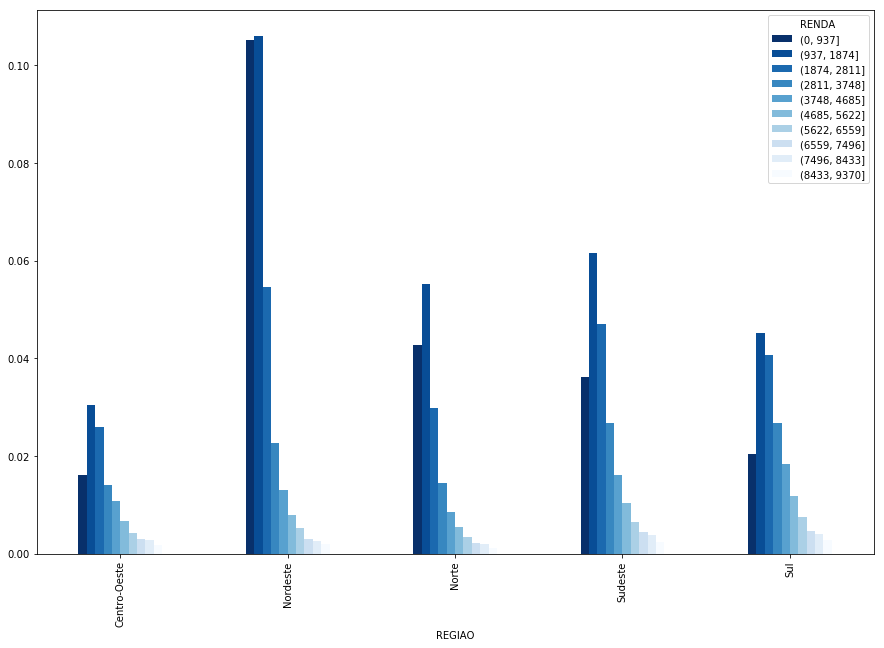

In [36]:
sal_reg.plot(kind="bar",figsize=(15,10), colormap="Blues_r")

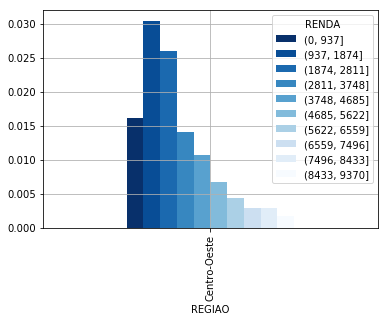

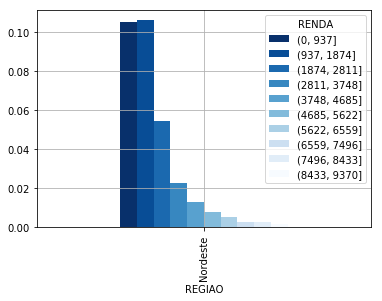

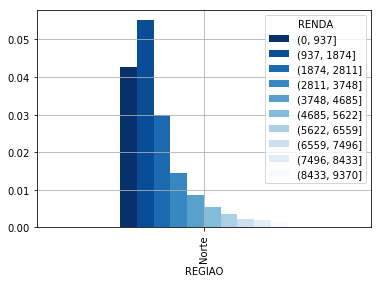

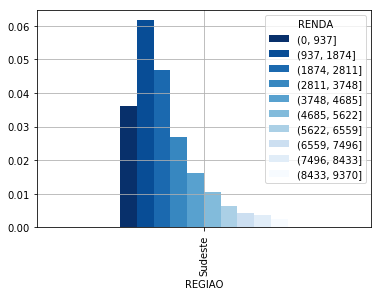

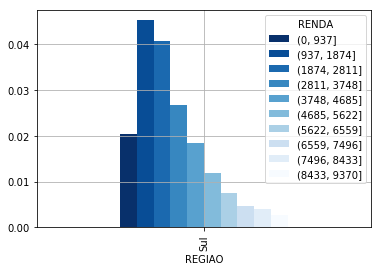

In [37]:
#fig,ax = plt.subplots()
#sal_reg[:1].plot(kind="bar")
for i in range(5):
    sal_reg[i:i+1].plot(kind="bar",grid = True, colormap ="Blues_r" )
    

In [38]:
# grande parte da regiao nordeste e norte vive com menos de 3 salarios minimos, mas representam grande parte da populacao
# regiao sul, centro-oeste e sudeste sao regioes mais ricas

In [39]:
sal_min.value_counts()
sal_net=pd.crosstab(dados_interesse["ACESSO A INTERNET"],sal_min,normalize = True)
# ronaldo=pd.crosstab(sal_net,dados_interesse["REGIAO"])
b=sal_net.sum().sum()
sal_net*100/b



RENDA,"(0, 937]","(937, 1874]","(1874, 2811]","(2811, 3748]","(3748, 4685]","(4685, 5622]","(5622, 6559]","(6559, 7496]","(7496, 8433]","(8433, 9370]"
ACESSO A INTERNET,,,,,,,,,,
Nao,15.114310,16.180098,7.706255,2.943342,1.311527,0.602842,0.286235,0.179472,0.127011,0.075470
Sim,5.664875,12.940397,12.411184,8.052314,5.746788,3.945625,2.600965,1.648382,1.494680,0.968229


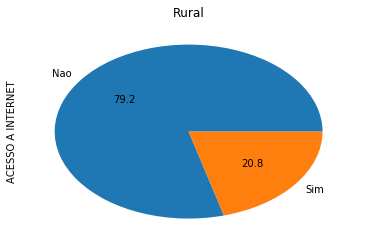

In [40]:
#sal_net.plot(kind="pie")
#pizza=dados_interesse["ACESSO A INTERNET"][dados_interesse.URBANIZACAO == 'URBANA'].value_counts()
#pizza.plot(kind="pie")
rural_net=(dados_interesse["ACESSO A INTERNET"])[dados_interesse.URBANIZACAO=="Rural"].value_counts()
rural_net.plot(kind="pie",autopct="%0.1f", title= "Rural")


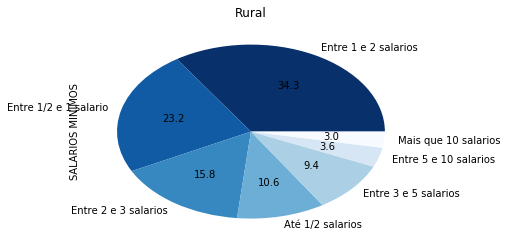

In [41]:
rural_sal=(dados_interesse["SALARIOS MINIMOS"])[dados_interesse.URBANIZACAO=="Rural"].value_counts()
rural_sal.plot(kind="pie",autopct="%0.1f", title= "Rural", colormap="Blues_r")

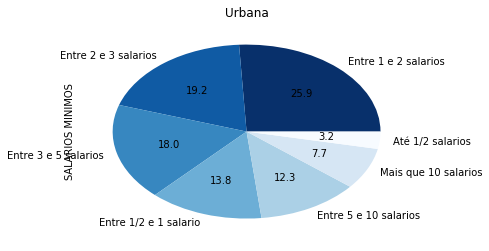

In [42]:
urb_sal=(dados_interesse["SALARIOS MINIMOS"])[dados_interesse.URBANIZACAO=="Urbana"].value_counts()
urb_sal.plot(kind="pie",autopct="%0.1f", title= "Urbana", colormap="Blues_r")


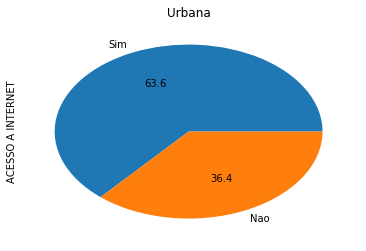

In [43]:
urb_net=(dados_interesse["ACESSO A INTERNET"])[dados_interesse.URBANIZACAO=="Urbana"].value_counts()
urb_net.plot(kind="pie",autopct="%0.1f", title= "Urbana")


Esses graficos mostram que a grande maioria da populacao rural brasileira nao tem acessoa internet (80%), enquanto boa parte 
da populacao urbana tem acesso(60%)

count        7.000000
mean      4639.428571
std       3184.193873
min       1315.000000
25%       2484.500000
50%       3446.000000
75%       6242.000000
max      10262.000000
Name: SALARIOS MINIMOS, dtype: float64

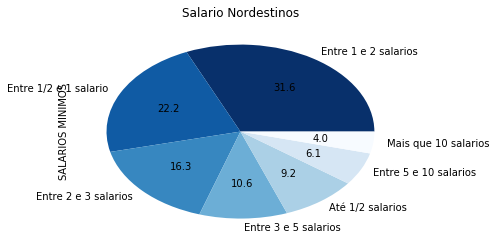

In [44]:
sal_nord= (dados_interesse["SALARIOS MINIMOS"])[dados_interesse.REGIAO=="Nordeste"].value_counts()
sal_nord.plot(kind="pie",autopct="%0.1f", title= "Salario Nordestinos", colormap="Blues_r")
sal_nord.describe()

In [45]:
#existe grande parte da populacao que ainda nao tem acesso a internet e tem uma renda razoavel

In [46]:
sal_cel=pd.crosstab(sal_min,dados_interesse["ACESSO A CELULAR"],normalize = True)
# ronaldo=pd.crosstab(sal_net,dados_interesse["REGIAO"])
# b=sal_cel.sum().sum()
# sal_cel*100/b
sal_cel

ACESSO A CELULAR,Nao,Sim
RENDA,,
"(0, 937]",0.043359,0.164433
"(937, 1874]",0.029765,0.261440
"(1874, 2811]",0.008817,0.192357
"(2811, 3748]",0.002872,0.107085
"(3748, 4685]",0.001068,0.069516
"(4685, 5622]",0.000534,0.044951
"(5622, 6559]",0.000267,0.028605
"(6559, 7496]",0.000221,0.018058
"(7496, 8433]",0.000110,0.016106


Nao    8783
Sim    8001
Name: ACESSO A INTERNET, dtype: int64

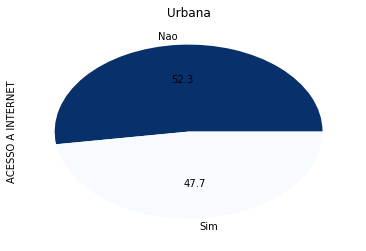

In [142]:
net_nort= (dados_interesse["ACESSO A INTERNET"])[dados_interesse.REGIAO=="Norte"].value_counts()
net_nort.plot(kind="pie",autopct="%0.1f", title= "Urbana", colormap="Blues_r")
net_nort

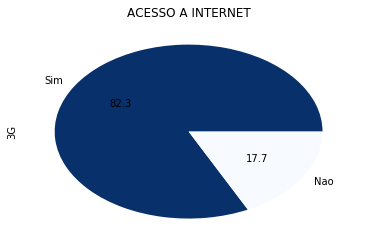

In [143]:
nort_3G= (dados_interesse["3G"])[dados_interesse.REGIAO=="Norte"].value_counts()
nort_3G.plot(kind="pie",autopct="%0.1f", title= "ACESSO A INTERNET", colormap="Blues_r")
nort_bl= (dados_interesse["BANDA LARGA"])[dados_interesse.REGIAO=="Norte"].value_counts()
nort_cd= (dados_interesse["CONEXAO DISCADA"])[dados_interesse.REGIAO=="Norte"].value_counts()
nort_3G
nort_bl.sum()
# nord_cd
soma=(nort_3G.sum()+nort_bl.sum()+nort_cd.sum())


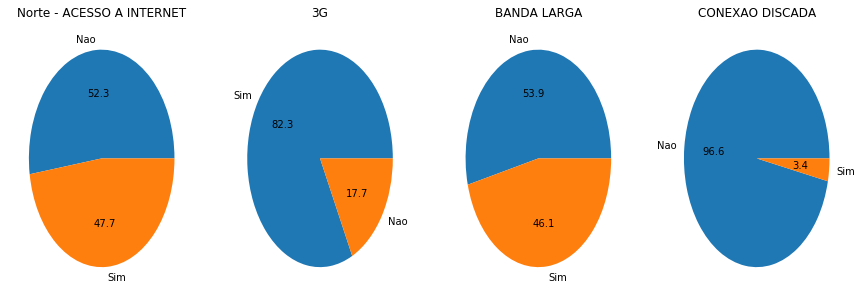

In [161]:
f, axarr = plt.subplots(1,4,figsize=(15,5))
axarr[0].pie(net_nort,autopct="%0.1f",labels=net_nort.index)
axarr[0].set_title('Norte - ACESSO A INTERNET')


axarr[1].pie(nort_3G,autopct="%0.1f",labels=nort_3G.index)
axarr[1].set_title('3G')


axarr[2].pie(nort_bl,autopct="%0.1f",labels=nort_bl.index)
axarr[2].set_title('BANDA LARGA')

axarr[3].pie(nort_cd,autopct="%0.1f",labels=nort_cd.index)
axarr[3].set_title('CONEXAO DISCADA')




In [ ]:
#De acordo com esses dados, a empresa de telecominacao que deseja expandir suas vendas para regiao norte, deve concentrar-se
#para na venda de planos 3G, pois, dos 47% que acessam internet, 82% acessam por 3G, mostrando a preferencia da regiao
#por esse tipo de serviço, a empresa deve-se concentrar para aumentar o numero de pessoas que acessam a internet(47%)

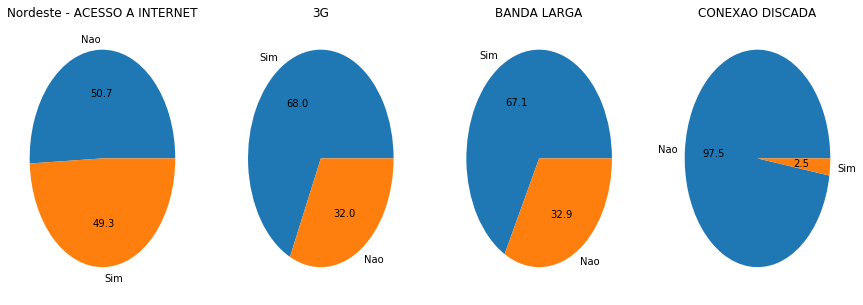

In [159]:
net_nord= (dados_interesse["ACESSO A INTERNET"])[dados_interesse.REGIAO=="Nordeste"].value_counts()
nord_3G= (dados_interesse["3G"])[dados_interesse.REGIAO=="Nordeste"].value_counts()
#nord_3G.plot(kind="pie",autopct="%0.1f", title= "ACESSO A INTERNET", colormap="Blues_r")
nord_bl= (dados_interesse["BANDA LARGA"])[dados_interesse.REGIAO=="Nordeste"].value_counts()
nord_cd= (dados_interesse["CONEXAO DISCADA"])[dados_interesse.REGIAO=="Nordeste"].value_counts()

f, axarr = plt.subplots(1,4,figsize=(15,5))
axarr[0].pie(net_nord,autopct="%0.1f",labels=net_nord.index)
axarr[0].set_title('Nordeste - ACESSO A INTERNET')


axarr[1].pie(nord_3G,autopct="%0.1f",labels=nord_3G.index)
axarr[1].set_title('3G')


axarr[2].pie(nord_bl,autopct="%0.1f",labels=nord_bl.index)
axarr[2].set_title('BANDA LARGA')

axarr[3].pie(nord_cd,autopct="%0.1f",labels=nord_cd.index)
axarr[3].set_title('CONEXAO DISCADA')



In [ ]:
#No nordeste existe um grande mercado em potencial, populacao grande e um grande numero de pessoas que ainda n tem acesso a 
# internet, a empresa pode investir em planos conjuntos de 3G e Banda Larga

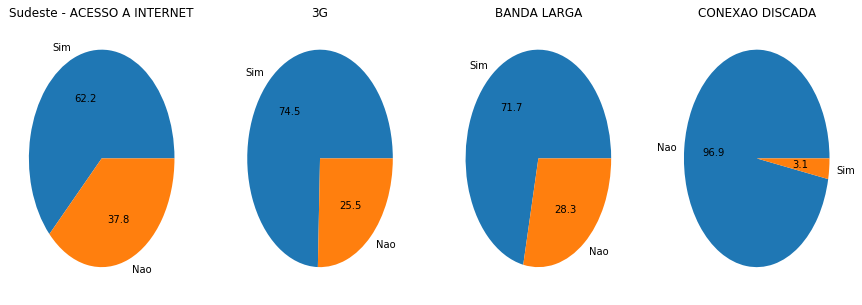

In [160]:
net_sud= (dados_interesse["ACESSO A INTERNET"])[dados_interesse.REGIAO=="Sudeste"].value_counts()
sud_3G= (dados_interesse["3G"])[dados_interesse.REGIAO=="Sudeste"].value_counts()
#nord_3G.plot(kind="pie",autopct="%0.1f", title= "ACESSO A INTERNET", colormap="Blues_r")
sud_bl= (dados_interesse["BANDA LARGA"])[dados_interesse.REGIAO=="Sudeste"].value_counts()
sud_cd= (dados_interesse["CONEXAO DISCADA"])[dados_interesse.REGIAO=="Sudeste"].value_counts()

f, axarr = plt.subplots(1,4,figsize=(15,5))
axarr[0].pie(net_sud,autopct="%0.1f",labels=net_sud.index)
axarr[0].set_title('Sudeste - ACESSO A INTERNET')


axarr[1].pie(sud_3G,autopct="%0.1f",labels=sud_3G.index)
axarr[1].set_title('3G')


axarr[2].pie(sud_bl,autopct="%0.1f",labels=sud_bl.index)
axarr[2].set_title('BANDA LARGA')

axarr[3].pie(sud_cd,autopct="%0.1f",labels=sud_cd.index)
axarr[3].set_title('CONEXAO DISCADA')



C:\Users\JUAN\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [48]:
dados_interesse.to_csv("filtrado.csv")